In [ ]:
pip install tensorflow

In [ ]:
pip install keras numpy matplotlib mnist

In [2]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn

In [ ]:
#Load Dataset
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
xtrain[1].shape

In [ ]:
xtrain[1]

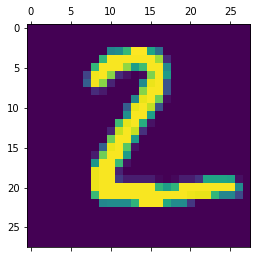

In [10]:
plt.matshow(xtest[1])

In [11]:
#Feature Sclaing
#Normalize 

xtrain = (xtrain / 255)

In [ ]:
xtrain[1]

In [13]:
xtest = xtest / 255

In [ ]:
xtest[1]

In [15]:
#flatten the images into 28*28 = 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [ ]:
xtrain[1]

In [17]:
xtrain.shape

(60000, 784)

In [18]:
model = keras.Sequential()
model.add( Dense(50, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='sigmoid'))

In [19]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [20]:
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=20,
          batch_size=32,
          )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2993 - accuracy: 0.9131
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1388 - accuracy: 0.9578
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1024 - accuracy: 0.9691
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9790
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9841
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

In [21]:
#Evaluate 
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1309 - accuracy: 0.9751


[0.1308744102716446, 0.9750999808311462]

In [22]:
pred = model.predict(xtest)

In [ ]:
pred

In [24]:
np.argmax(pred[1])

2

Text(69.0, 0.5, 'Truth Values')

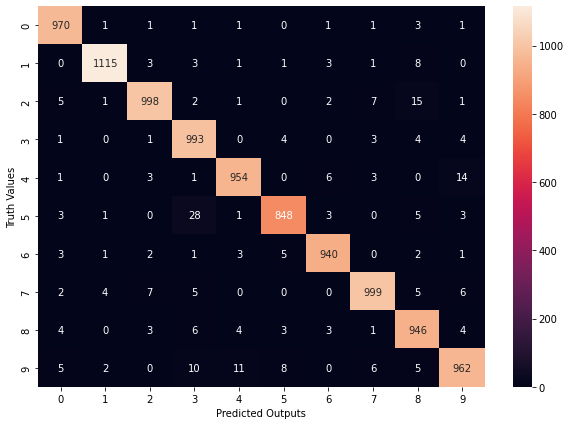

In [25]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')